In [239]:
import numpy as np
import pandas as pd
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Data description

Data source: https://www.kaggle.com/datasets/subhajitnayak/country-data?resource=download&select=Country-data.csv

|Attribute|Description|
|:-------|:-------|
|country | Name of the country |
|child_mort | Death of children under 5 years of age per 1000 live births |
|exports | Exports of goods and services. Given as %age of the Total GDP |
|health | Total health spending as %age of Total GDP |
|imports | Imports of goods and services. Given as %age of the Total GDP |
|Income | Net income per person |
|Inflation | The measurement of the annual growth rate of the Total GDP |
|life_expec | The average number of years a new born child would live if the current mortality patterns are to rem... |
|total_fer | The number of children that would be born to each woman if the current age-fertility rates remain th... |
|gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population. |

# Data loading

In [240]:
# df = pd.read_csv('data_clustering/country-data.csv')
df = pd.read_csv('https://homel.vsb.cz/~svo0175/country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [241]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


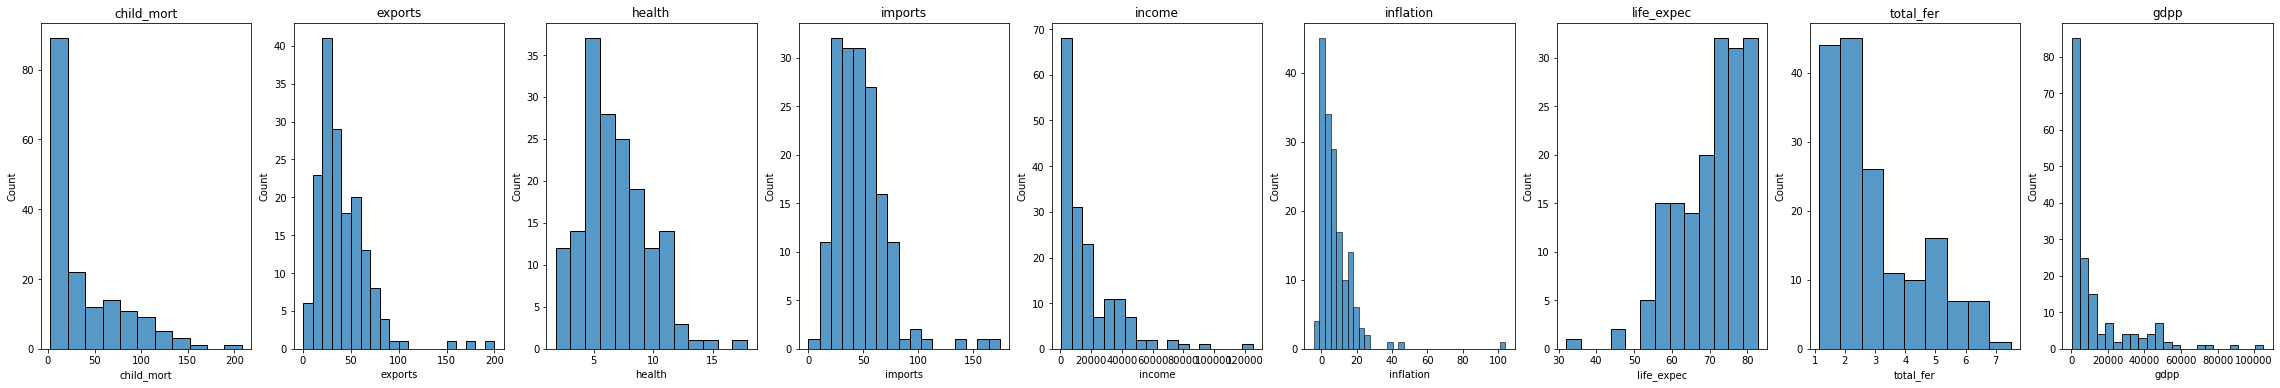

In [242]:
df_only_numeric = df.select_dtypes(np.number)

# Create the subplots
n_rows, n_cols = df_only_numeric.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(df_only_numeric):
    sns.histplot(data=df_only_numeric, x=column, ax=axes[i]).set_title(column)

# Data preprocessing
- Why do we need to preprocess the data?

In [243]:
X = df_only_numeric.values

In [244]:
scaler = sklearn.preprocessing.MinMaxScaler()
X_min_max_scaled = scaler.fit_transform(X)
X_min_max_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

# Clustering

## KMeans + clustering quality
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- Do you know any technique to determine the best number of clusters?

In [245]:
clustering = sklearn.cluster.KMeans(n_clusters=5)
clustering.fit(X_min_max_scaled)

KMeans(n_clusters=5)

In [246]:
clustering.labels_

array([3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 1, 0, 3, 3, 0, 0, 0, 3, 3, 2, 0, 3, 0, 1, 0,
       1, 0, 0, 2, 0, 3, 2, 0, 2, 1, 1, 2, 3, 0, 1, 2, 1, 0, 2, 3, 3, 2,
       3, 0, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 3,
       3, 0, 0, 4, 0, 2, 3, 0, 0, 3, 4, 3, 0, 2, 0, 2, 0, 0, 3, 2, 2, 2,
       1, 1, 3, 3, 1, 0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 0, 3, 0, 0,
       3, 4, 0, 1, 2, 2, 0, 1, 0, 0, 3, 0, 1, 1, 2, 3, 0, 3, 3, 2, 0, 0,
       2, 3, 0, 1, 1, 1, 0, 2, 2, 0, 0, 2, 3], dtype=int32)

In [247]:
pd.Series(clustering.labels_).value_counts()

0    66
2    37
3    32
1    29
4     3
dtype: int64

In [248]:
clustering.inertia_

14.966814843024189

In [249]:
sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)

0.2548635488285297

## Elbow method

#### Calculate SSE and Silhouette for differenet parameters of clusters $k \in <2, 15>$. Create visualization for both of clustering quality criteria

In [250]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k).fit(X_min_max_scaled)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_min_max_scaled, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores

,k,sse,silhouette
0,2,25.939571,0.379254
1,3,19.345622,0.342655
2,4,16.784453,0.346002
3,5,15.066145,0.241532
4,6,13.640866,0.260360
5,7,12.369069,0.229248
6,8,11.402875,0.231154
7,9,11.024659,0.238718
8,10,10.089289,0.210647


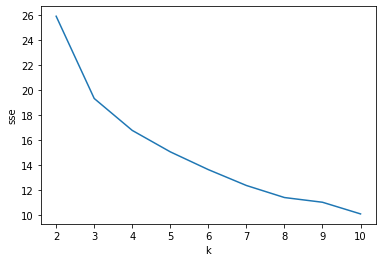

In [251]:
sns.lineplot(data=df_clustering_scores, x='k', y='sse')

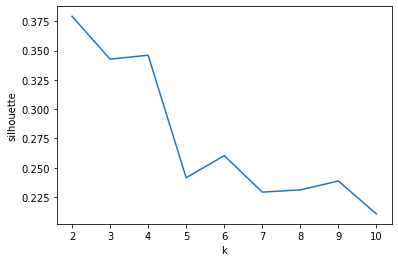

In [252]:
sns.lineplot(data=df_clustering_scores, x='k', y='silhouette')

#### How many cluster do you see ?

#### Can you imagine other quality criteria to use over some real dataset? Do you know difference between external and internal criteria?

## Clustering interpretation

In [253]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13)
clustering.fit(X_min_max_scaled)

KMeans(n_clusters=4, random_state=13)

In [254]:
df['cluster_id'] = clustering.labels_

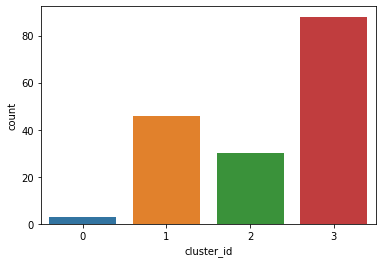

In [255]:
sns.countplot(data=df, x='cluster_id')

#### Use describe() for quick inspection of numeric values in dataset.

In [256]:
with pd.option_context('display.max_columns', None):
    display(df.groupby('cluster_id').describe())

child_mort                                                      \
                count       mean        std   min     25%    50%      75%   
cluster_id                                                                  
0                 3.0   4.133333   2.309401   2.8   2.800   2.80    4.800   
1                46.0  93.284783  34.079410  28.1  64.625  90.25  111.000   
2                30.0   4.953333   2.159140   2.6   3.825   4.20    5.100   
3                88.0  22.034091  14.526653   3.4  11.100  18.10   29.125   

                  exports                                                   \
              max   count        mean        std      min      25%     50%   
cluster_id                                                                   
0             6.8     3.0  176.000000  23.515952  153.000  164.000  175.00   
1           208.0    46.0   29.287174  18.479530    2.200   16.875   23.80   
2            10.8    30.0   45.826667  21.736255   12.400   28.425   44.25   
3            64.4    88.0   41.081693  19.439713    0.109   26.900   37.65   

                           health                                           \
                75%    max  count      mean       std   min     25%    50%   
cluster_id                                                                   
0           187.500  200.0    3.0  6.793333  2.492877  3.96  5.8650  7.770   
1            38.800   85.8   46.0  6.338478  2.668183  2.20  4.5150  5.480   
2            63.575  103.0   30.0  9.168667  3.266299  1.81  8.7850  9.535   
3            51.825   93.8   88.0  6.263750  2.162703  1.97  4.8975  5.990   

                           imports                                            \
                75%    max   count        mean        std       min      25%   
cluster_id                                                                     
0            8.2100   8.65     3.0  156.666667  16.165808  142.0000  148.000   
1            7.8450  13.10    46.0   43.297826  18.636362   17.2000   30.225   
2           11.0000  17.90    30.0   39.736667  17.455134   13.6000   28.025   
3            7.6225  14.20    88.0   47.464385  19.767404    0.0659   32.150   

                                   income                              \
               50%      75%    max  count          mean           std   
cluster_id                                                              
0           154.00  164.000  174.0    3.0  64033.333333  32460.642836   
1            41.50   49.525  101.0   46.0   3516.804348   5391.402727   
2            35.00   47.400   86.5   30.0  45250.000000  19785.308900   
3            48.95   60.425  108.0   88.0  13088.522727   8737.148794   

                                                         inflation             \
                min      25%      50%      75%       max     count       mean   
cluster_id                                                                      
0           28300.0  50200.0  72100.0  81900.0   91700.0       3.0   2.468000   
1             609.0   1390.0   1835.0   3310.0   33700.0      46.0  12.097065   
2           27200.0  34375.0  40550.0  45650.0  125000.0      30.0   2.742200   
3            1990.0   6725.0  11000.0  17500.0   45400.0      88.0   7.425352   

                                                             life_expec  \
                  std    min     25%    50%      75%     max      count   
cluster_id                                                                
0            2.179718 -0.046  1.7870  3.620   3.7250    3.83        3.0   
1           15.670791  0.885  3.9400  8.995  16.6000  104.00       46.0   
2            4.266366 -3.220  0.6505  1.190   3.2050   16.70       30.0   
3            7.765399 -4.210  2.3250  5.805   9.8575   45.90       88.0   

                                                                   total_fer  \
                 mean       std   min     25%    50%     75%   max     count   
cluster_id                                        

In [257]:
df[df['cluster_id'] == 0]['country'].head()

91     Luxembourg
98          Malta
133     Singapore
Name: country, dtype: object

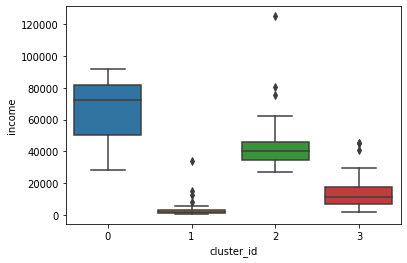

In [258]:
sns.boxplot(data=df, y='income', x='cluster_id')

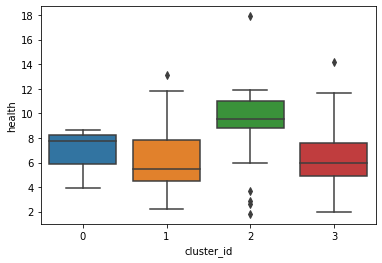

In [259]:
sns.boxplot(data=df, y='health', x='cluster_id')

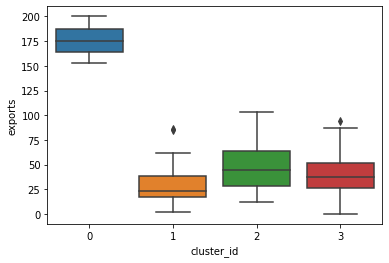

In [260]:
sns.boxplot(data=df, y='exports', x='cluster_id')

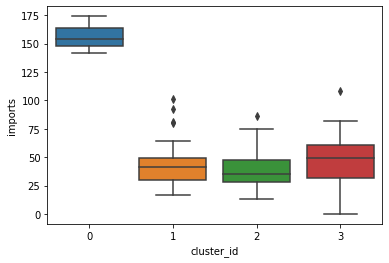

In [261]:
sns.boxplot(data=df, y='imports', x='cluster_id')

#### Are there any differences attributes for different clusters?
Clusters with id 1 and 3 contain countries with lower income. High income countries are mostly placed in small cluster with cluster_id 0, other countries with relative high income are in group 2.

#### Continue with description of detected clusters

# **\#1**

Countries in cluster zero both import and export a lot more than other countries. Which makes sense as all three countries are quite small, and, in the
case of Singapore and Luxembourg, very rich. It is quite surprising that Malta was grouped among these two countries, because, whilst Malta isn't poor by any
means, it is in no way incredibely rich, quite unlike the other two countries in this group.

We can also see that whilst countries in group no. 1 are much poorer than other
countries, they are not inherently that much unhealthier, and whilst the median
is the lowest among all four clusters, it is basically on par with cluster 3
and still better than outliers from cluster 2.

## DBSCAN + distance analysis
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
- https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

In [262]:
clustering = sklearn.cluster.DBSCAN()
clustering.fit(X_min_max_scaled)

DBSCAN()

In [263]:
pd.Series(clustering.labels_).value_counts()

 0    161
-1      6
dtype: int64

What does the number -1 means?
#### Find better parameters *eps* and *min_pts* and visualize you result

In [264]:
clustering = sklearn.cluster.DBSCAN(eps=0.2, min_samples=5).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

 1    75
-1    54
 0    21
 2    17
dtype: int64

#### Lets get insight into distances in our dataset and be able to configure our parameters for DBSCAN

In [265]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix

array([[0.        , 0.85938446, 0.74311097, ..., 0.8546914 , 0.40426303,
        0.22412638],
       [0.85938446, 0.        , 0.2957055 , ..., 0.31085967, 0.58498839,
        0.84241764],
       [0.74311097, 0.2957055 , 0.        , ..., 0.41013299, 0.38283615,
        0.69477761],
       ...,
       [0.8546914 , 0.31085967, 0.41013299, ..., 0.        , 0.59790897,
        0.81790284],
       [0.40426303, 0.58498839, 0.38283615, ..., 0.59790897, 0.        ,
        0.36781892],
       [0.22412638, 0.84241764, 0.69477761, ..., 0.81790284, 0.36781892,
        0.        ]])

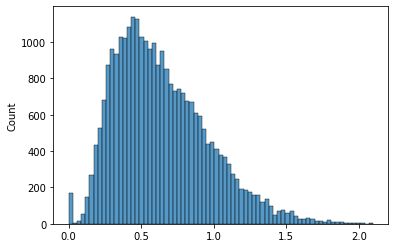

In [266]:
sns.histplot(distance_matrix.flatten())

In [267]:
distance_matrix = scipy.spatial.distance_matrix(X_min_max_scaled, X_min_max_scaled)
distance_matrix.sort(axis=1)
distance_matrix

array([[0.        , 0.14842545, 0.15137223, ..., 1.535181  , 1.73891415,
        1.83776206],
       [0.        , 0.1097279 , 0.11452457, ..., 1.31412931, 1.3148987 ,
        1.48628607],
       [0.        , 0.15065842, 0.1712165 , ..., 1.28222406, 1.35681504,
        1.52301869],
       ...,
       [0.        , 0.18710912, 0.21453506, ..., 1.26599787, 1.27534801,
        1.3823712 ],
       [0.        , 0.17442501, 0.17785416, ..., 1.32168729, 1.53925858,
        1.67687246],
       [0.        , 0.10082188, 0.15766287, ..., 1.47501506, 1.68334477,
        1.79717218]])

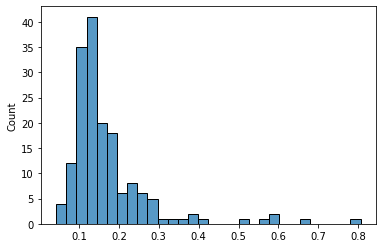

In [268]:
sns.histplot(distance_matrix[:, 1])

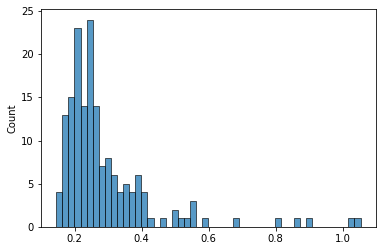

In [269]:
sns.histplot(distance_matrix[:, 10], bins=50)

#### What can we notice in previous visualizations?

In [270]:
clustering = sklearn.cluster.DBSCAN(eps=0.25, min_samples=10).fit(X_min_max_scaled)
pd.Series(clustering.labels_).value_counts()

 1    102
-1     38
 0     27
dtype: int64

#### Description of clusters (and probably noise points too)

In [271]:
df['cluster_id'] = clustering.labels_

In [272]:
df[df.cluster_id == -1].country.values

array(['Angola', 'Botswana', 'Brunei', 'Burundi',
       'Central African Republic', 'Chad', 'Congo, Rep.',
       'Equatorial Guinea', 'Gabon', 'Haiti', 'Iraq', 'Ireland',
       'Kiribati', 'Kuwait', 'Lesotho', 'Liberia', 'Luxembourg', 'Malta',
       'Micronesia, Fed. Sts.', 'Mongolia', 'Niger', 'Nigeria', 'Norway',
       'Oman', 'Pakistan', 'Qatar', 'Rwanda', 'Saudi Arabia',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Solomon Islands',
       'South Africa', 'Timor-Leste', 'Turkmenistan',
       'United Arab Emirates', 'United States', 'Venezuela'], dtype=object)

In [273]:
df[df.cluster_id == 0].country.values

array(['Afghanistan', 'Benin', 'Burkina Faso', 'Cameroon', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Kenya', 'Lao', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mozambique', 'Senegal', 'Sudan',
       'Tajikistan', 'Tanzania', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype=object)

In [274]:
df[df.cluster_id == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cambodia', 'Canada', 'Cape Verde', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco',
       'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand',
       'Panama', 'Paragu

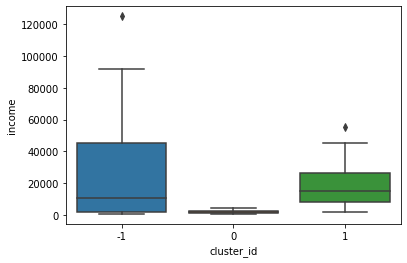

In [275]:
sns.boxplot(data=df, y='income', x='cluster_id')

### How would you treat non-numerical attributes?

### For more info about Sklearn clustering, take a look into documentation https://scikit-learn.org/stable/modules/clustering.html#clustering

# Task (2p)

Continue with clustering analysis:
1. Let's add more information for already detected clusters (code above). Choose one of already used method (k-means or DBSCAN) and add more description for clusters.

MinMax scaling is not the only best possibility for scaling of numerical attributes.

2. Take a look into documentation (https://scikit-learn.org/stable/modules/classes.html?highlight=preprocessing#module-sklearn.preprocessing) and choose other method for scaling your features.

3. Apply clustering method of your choice (https://scikit-learn.org/stable/modules/clustering.html) for differently scaled data.

4. Describe detected clusters.

As a bonus, it may be interesting to combine differently scaled features - e.g. feature1 scaled using MinMax, feature2 scaled using PowerTransform etc. And used this dataset for clustering.

# **\#1**

Countries in cluster zero both import and export a lot more than other countries. Which makes sense as all three countries are quite small, and, in the
case of Singapore and Luxembourg, very rich. It is quite surprising that Malta was grouped among these two countries, because, whilst Malta isn't poor by any
means, it is in no way incredibely rich, quite unlike the other two countries in this group.

We can also see that whilst countries in group no. 1 are much poorer than other
countries, they are not inherently that much unhealthier, and whilst the median
is the lowest among all four clusters, it is basically on par with cluster 3
and still better than outliers from cluster 2.

In [276]:
df = pd.read_csv('https://homel.vsb.cz/~svo0175/country-data.csv')

minmax = sklearn.preprocessing.MinMaxScaler()
power = sklearn.preprocessing.PowerTransformer()

num_only = df.select_dtypes(np.number).copy()

num_only['child_mort'] = power.fit_transform(num_only[['child_mort']])
num_only['income'] = power.fit_transform(num_only[['income']])

num_only['imports'] = power.fit_transform(num_only[['imports']])
num_only['exports'] = power.fit_transform(num_only[['exports']])
num_only['inflation'] = power.fit_transform(num_only[['inflation']])
num_only['gdpp'] = power.fit_transform(num_only[['gdpp']])

num_only['life_expec'] = power.fit_transform(num_only[['life_expec']])
num_only['total_fer'] = power.fit_transform(num_only[['total_fer']])

num_only['health'] = power.fit_transform(num_only[['health']])

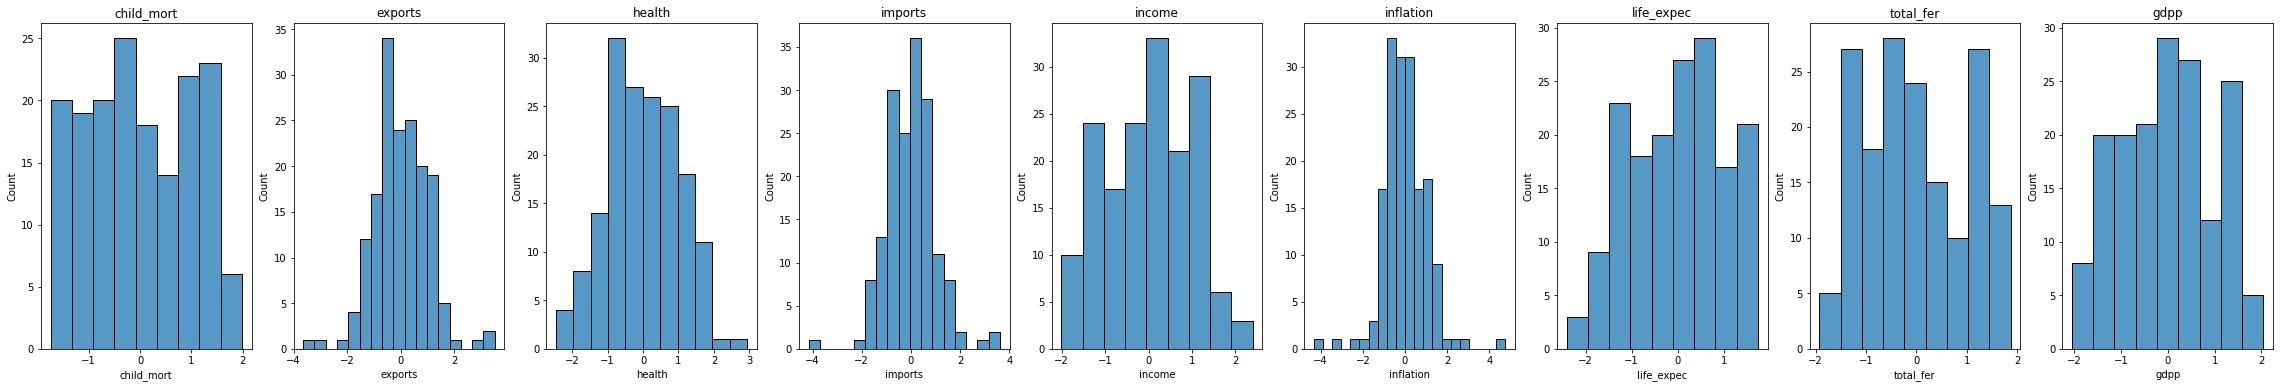

In [277]:
# Create the subplots
n_rows, n_cols = num_only.shape
fig, axes = plt.subplots(nrows=1, ncols=n_cols, figsize=(40, 6))
for i, column in enumerate(num_only):
    sns.histplot(data=num_only, x=column, ax=axes[i]).set_title(column)

In [278]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13)
clustering.fit(num_only)

KMeans(n_clusters=4, random_state=13)

In [279]:
df['cluster_id'] = clustering.labels_

In [280]:
print(df[df.cluster_id == 0]['country'].values, end='\n\n')
print(df[df.cluster_id == 1]['country'].values, end='\n\n')
print(df[df.cluster_id == 2]['country'].values, end='\n\n')
print(df[df.cluster_id == 3]['country'].values, end='\n\n')

['Albania' 'Algeria' 'Argentina' 'Armenia' 'Azerbaijan' 'Belize' 'Bhutan'
 'Bolivia' 'Botswana' 'Cape Verde' 'China' 'Colombia' 'Congo, Rep.'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Fiji' 'Gabon' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Indonesia'
 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Libya'
 'Moldova' 'Mongolia' 'Morocco' 'Namibia' 'Oman' 'Paraguay' 'Peru'
 'Philippines' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'South Africa'
 'Sri Lanka' 'St. Vincent and the Grenadines' 'Suriname' 'Tonga' 'Tunisia'
 'Turkey' 'Turkmenistan' 'Ukraine' 'Uzbekistan' 'Vanuatu' 'Venezuela'
 'Vietnam']

['Australia' 'Austria' 'Bahamas' 'Barbados' 'Bosnia and Herzegovina'
 'Brazil' 'Canada' 'Chile' 'Costa Rica' 'Croatia' 'Denmark' 'Finland'
 'France' 'Germany' 'Greece' 'Iceland' 'Israel' 'Italy' 'Japan'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Serbia' 'Spain'
 'Sweden' 'Switzerland' 'United Kingdom' 'United States' 'Uruguay']

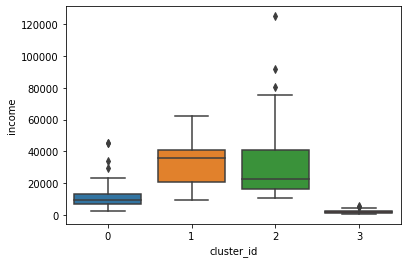

In [281]:
sns.boxplot(data=df, y='income', x='cluster_id')

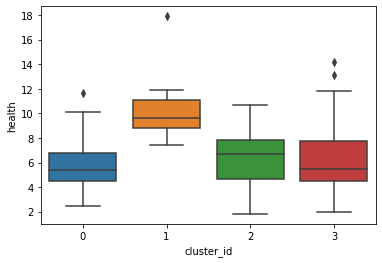

In [282]:
sns.boxplot(data=df, y='health', x='cluster_id')

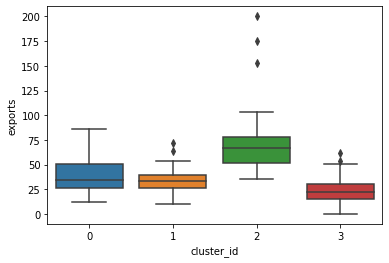

In [283]:
sns.boxplot(data=df, y='exports', x='cluster_id')

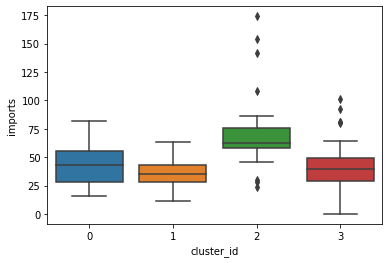

In [284]:
sns.boxplot(data=df, y='imports', x='cluster_id')

I tried using both minmax and power scaling but using powerscaling for literally all attributes seems to have yielded the best results.

Cluster 3 appears to contain the poorest countries - mostly african countries with some less developed asian countries mixed in.

Clusters 1 and 2 contain richer countries, mostly Northern American and European Countries, New Zealand, Australia, as well as expensive tourist destinations.

Cluster 0 contains many socialist and post-soviet countries, as well as some more developed African countries along some less developed tourist destinations in Asia. Thus, we have mathematically proved the famous Czech limerick `se sovětským svazem přišla bída na zem`.

Countries in cluster 2 export and import the most. This cluster contains many smaller countries which aren't really self-sufficient, as well as petroleum exporting Arabic countries located in the desert. As these countries can hardly
grow crops, they must resort to exporting oil and importing everything else.